In [16]:
RANDOM_SEED = 42

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import pickle

In [18]:
train_stage_2_RF = pd.read_csv("../data/train_stage_2.csv")

X_train = train_stage_2_RF.drop(columns=["Label", "Unnamed: 0"])
y_train = train_stage_2_RF["Label"]

print(X_train.shape)
del train_stage_2_RF

(5320, 66)


In [19]:
X_train.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Fwd Packets Length Total', 'Bwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'ECE F

In [20]:
validation_stage_2_RF = pd.read_csv("../data/validation_stage_2.csv")

X_val = validation_stage_2_RF.drop(columns=["Label", "Unnamed: 0"])
y_val = validation_stage_2_RF["Label"]

del validation_stage_2_RF

In [21]:
with open(f"../Repositório_Base/models/stage2_rf_scaler.p","rb") as f:
    stage2_scaler = pickle.load(f)

c:\Users\henri\OneDrive\Área de Trabalho\Programação\Projetos e Atividades\Graduação BSI\Eletivas\Detecção de Intrusão\Deteccao_de_Intrusao_Hierarquica_Multiestagio\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator QuantileTransformer from version 1.1.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [22]:
floresta = RandomForestClassifier(max_features=0.1751204590963604,
                       max_samples=0.9034128710297624, n_estimators=97,
                       random_state=RANDOM_SEED)


In [23]:
stage2 = Pipeline([("scaler",stage2_scaler),("floresta",floresta)])
stage2.fit(X_train,y_train)

Pipeline(steps=[('scaler',
                 QuantileTransformer(output_distribution='normal',
                                     subsample=100000)),
                ('floresta',
                 RandomForestClassifier(max_features=0.1751204590963604,
                                        max_samples=0.9034128710297624,
                                        n_estimators=97, random_state=42))])

In [24]:
y_pred_train = stage2.predict(X_train)
print(classification_report(y_train ,y_pred_train))

              precision    recall  f1-score   support

      (D)DOS       1.00      1.00      1.00      1076
      Botnet       1.00      1.00      1.00      1040
 Brute Force       1.00      1.00      1.00      1100
   Port Scan       1.00      1.00      1.00      1066
  Web-Attack       1.00      1.00      1.00      1038

    accuracy                           1.00      5320
   macro avg       1.00      1.00      1.00      5320
weighted avg       1.00      1.00      1.00      5320



In [25]:
np.unique(y_val)

array(['(D)DOS', 'BENIGN', 'Botnet', 'Brute Force', 'Port Scan',
       'Web-Attack'], dtype=object)

In [26]:
y_val_anomalia = y_val[y_val != "BENIGN"]
X_val_anomalia = X_val[y_val != "BENIGN"]
y_pred_val = stage2.predict(X_val[y_val != "BENIGN"])
print(classification_report(y_val[y_val != "BENIGN"] ,y_pred_val))

              precision    recall  f1-score   support

      (D)DOS       0.98      0.99      0.99       300
      Botnet       1.00      1.00      1.00       300
 Brute Force       0.99      1.00      1.00       300
   Port Scan       0.99      0.99      0.99       300
  Web-Attack       1.00      0.99      0.99       300

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



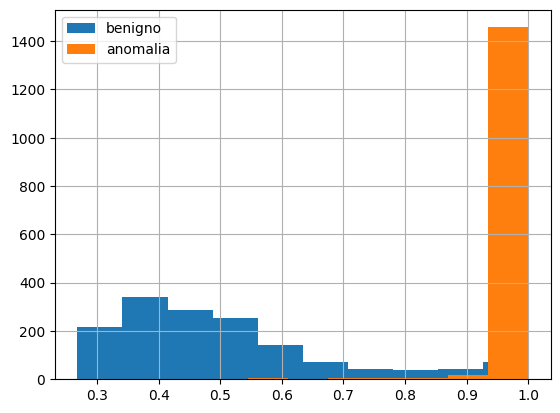

In [27]:
y_score_anomalia = stage2.predict_proba(X_val_anomalia)
y_score_benigno  = stage2.predict_proba(X_val[y_val == "BENIGN"])

pd.Series(y_score_benigno.max(axis=1)).hist(label= 'benigno')
pd.Series(y_score_anomalia.max(axis=1)).hist(label= 'anomalia')
plt.legend()
plt.show()

In [28]:
y_score_anomalia

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [29]:
with open(r'../models/reprodução/SecondStage.p', 'wb') as segundo_estagio_file:
    pickle.dump(stage2, segundo_estagio_file)

In [30]:
stage2.classes_

array(['(D)DOS', 'Botnet', 'Brute Force', 'Port Scan', 'Web-Attack'],
      dtype=object)